# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.056945e+01     8.258242e+00
 * time: 0.0017499923706054688
     1     2.905068e+01     4.384281e+00
 * time: 0.006932973861694336
     2     2.891733e+01     6.582786e+00
 * time: 0.01250910758972168
     3     2.460378e+01     6.838193e+00
 * time: 0.01843404769897461
     4     1.452980e+01     3.242407e+00
 * time: 0.024689912796020508
     5     1.052737e+01     1.690853e+00
 * time: 0.03016495704650879
     6     9.919076e+00     1.683149e+00
 * time: 0.0355229377746582
     7     9.564290e+00     1.702029e+00
 * time: 0.040884971618652344
     8     9.081312e+00     1.154243e+00
 * time: 0.04554009437561035
     9     8.797685e+00     9.366787e-01
 * time: 0.05059695243835449
    10     8.589244e+00     9.425291e-01
 * time: 0.055724143981933594
    11     8.385369e+00     9.579079e-01
 * time: 0.06098008155822754
    12     8.274054e+00     8.598924e-01
 * time: 0.06637001037597656
    13     8.173062e+00     4.762471e-01
 * 

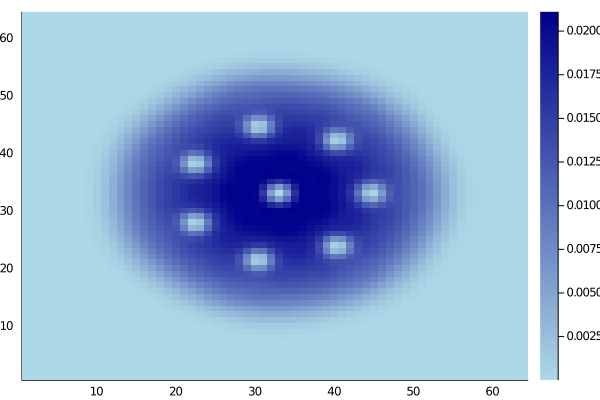

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)